In [95]:
# Import all the required libraries 

from glob import glob
import mne
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats
from scipy import signal
from scipy import fftpack
import pywt
import os,sys
from scipy.signal import coherence

In [96]:
all_files = glob('F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\*.edf')
print(len(all_files))
print(all_files[0])

80
F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H10_EC_post.edf


In [97]:
EC_pre = [i for i in all_files if 'EC_pre' in i.split("\\")[4]]
EC_post = [i for i in all_files if 'EC_post' in i.split("\\")[4]]

EC_pre.sort()
EC_post.sort()

print(EC_pre[19], EC_post[19])

F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H9_EC_pre.edf F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H9_EC_post.edf


In [98]:
%%capture

alpha = [8, 13]
beta = [13, 30]
delta = [1.25, 4]
theta = [4, 8]
gamma = [30, 48]

alpha_powers_pre = []
beta_powers_pre = []
delta_powers_pre = []
theta_powers_pre = []
gamma_powers_pre = []

alpha_powers_pre_all = []
beta_powers_pre_all = []
delta_powers_pre_all = []
theta_powers_pre_all = []
gamma_powers_pre_all = []

def signal_power(signal_data, sample_rate, f_low, f_high):
    # Apply FFT to the signal data
    signal_fft = fftpack.fft(signal_data)
    # Get the frequency axis
    signal_freqs = fftpack.fftfreq(len(signal_data), d=1/sample_rate)
    # Find the power of the signal in the frequency band of interest
    power = 0
    for i, freq in enumerate(signal_freqs):
        if freq >= f_low and freq <= f_high:
            power += abs(signal_fft[i])**2
    return power

for file in EC_pre:
    raw = mne.io.read_raw_edf(file, preload=True, exclude=['EEG VREF'])
    raw = raw.crop(tmin=10, tmax=300)
    # alpha_spect = (raw.copy()).filter(alpha[0], alpha[1])
    # beta_spect = (raw.copy()).filter(beta[0], beta[1])
    # delta_spect = (raw.copy()).filter(delta[0], delta[1])
    # theta_spect = (raw.copy()).filter(theta[0], theta[1])

    # alpha_psd = alpha_spect.compute_psd(fmin = alpha[0], fmax = alpha[1])
    # beta_psd = beta_spect.compute_psd(fmin = beta[0], fmax = beta[1])
    # delta_psd = delta_spect.compute_psd(fmin = delta[0], fmax = delta[1])
    # theta_psd = theta_spect.compute_psd(fmin = theta[0], fmax = theta[1])

    # alpha_powers_pre.append(alpha_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))
    # beta_powers_pre.append(beta_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))
    # delta_powers_pre.append(delta_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))
    # theta_powers_pre.append(theta_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))
    alpha_patient = []
    beta_patient = []
    delta_patient = []
    theta_patient = []
    gamma_patient = []
    for i in range(64):
        alpha_patient.append(signal_power(raw.get_data()[i], 1000, alpha[0], alpha[1]))
        beta_patient.append(signal_power(raw.get_data()[i], 1000, beta[0], beta[1]))
        delta_patient.append(signal_power(raw.get_data()[i], 1000, delta[0], delta[1]))
        theta_patient.append(signal_power(raw.get_data()[i], 1000, theta[0], theta[1]))
        gamma_patient.append(signal_power(raw.get_data()[i], 1000, gamma[0], gamma[1]))
    alpha_powers_pre_all.append(alpha_patient)
    beta_powers_pre_all.append(beta_patient)
    delta_powers_pre_all.append(delta_patient)
    theta_powers_pre_all.append(theta_patient)
    gamma_powers_pre_all.append(gamma_patient)

    # alpha_powers_pre_all.append(alpha_psd.get_data().mean(axis = 1) * pow(10, 13))
    # beta_powers_pre_all.append(beta_psd.get_data().mean(axis = 1) * pow(10, 13))
    # delta_powers_pre_all.append(delta_psd.get_data().mean(axis = 1) * pow(10, 13))
    # theta_powers_pre_all.append(theta_psd.get_data().mean(axis = 1) * pow(10, 13))

In [99]:

alpha_powers_pre = []
beta_powers_pre = []
delta_powers_pre = []
theta_powers_pre = []
gamma_powers_pre = []
for i in range(20):
    alpha_powers_pre.append(sum(alpha_powers_pre_all[i]) / len(alpha_powers_pre_all[i]))
    beta_powers_pre.append(sum(beta_powers_pre_all[i]) / len(beta_powers_pre_all[i]))
    delta_powers_pre.append(sum(delta_powers_pre_all[i]) / len(delta_powers_pre_all[i]))
    theta_powers_pre.append(sum(theta_powers_pre_all[i]) / len(theta_powers_pre_all[i]))
    gamma_powers_pre.append(sum(gamma_powers_pre_all[i]) / len(gamma_powers_pre_all[i]))

In [100]:
%%capture

alpha = [8, 13]
beta = [13, 30]
delta = [1.25, 4]
theta = [4, 8]
gamma = [30, 48]

alpha_powers_post = []
beta_powers_post = []
delta_powers_post = []
theta_powers_post = []
gamma_powers_post = []

alpha_powers_post_all = []
beta_powers_post_all = []
delta_powers_post_all = []
theta_powers_post_all = []
gamma_powers_post_all = []

for file in EC_post:
    raw = mne.io.read_raw_edf(file, preload=True, exclude=['EEG VREF'])
    raw = raw.crop(tmin=10, tmax=300)

    # alpha_spect = raw.copy().filter(alpha[0], alpha[1])
    # beta_spect = raw.copy().filter(beta[0], beta[1])
    # delta_spect = raw.copy().filter(delta[0], delta[1])
    # theta_spect = raw.copy().filter(theta[0], theta[1])

    # alpha_psd = alpha_spect.compute_psd(fmin = alpha[0], fmax = alpha[1])
    # beta_psd = beta_spect.compute_psd(fmin = beta[0], fmax = beta[1])
    # delta_psd = delta_spect.compute_psd(fmin = delta[0], fmax = delta[1])
    # theta_psd = theta_spect.compute_psd(fmin = theta[0], fmax = theta[1])

    # alpha_powers_post.append(alpha_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))
    # beta_powers_post.append(beta_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))
    # delta_powers_post.append(delta_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))
    # theta_powers_post.append(theta_psd.get_data().mean(axis = 1).mean(axis=0) * pow(10, 13))

    # alpha_powers_post_all.append(alpha_psd.get_data().mean(axis = 1) * pow(10, 13))
    # beta_powers_post_all.append(beta_psd.get_data().mean(axis = 1) * pow(10, 13))
    # delta_powers_post_all.append(delta_psd.get_data().mean(axis = 1) * pow(10, 13))
    # theta_powers_post_all.append(theta_psd.get_data().mean(axis = 1) * pow(10, 13))

    alpha_patient = []
    beta_patient = []
    delta_patient = []
    theta_patient = []
    gamma_patient = []
    for i in range(64):
        alpha_patient.append(signal_power(raw.get_data()[i], 1000, alpha[0], alpha[1]))
        beta_patient.append(signal_power(raw.get_data()[i], 1000, beta[0], beta[1]))
        delta_patient.append(signal_power(raw.get_data()[i], 1000, delta[0], delta[1]))
        theta_patient.append(signal_power(raw.get_data()[i], 1000, theta[0], theta[1]))
        gamma_patient.append(signal_power(raw.get_data()[i], 1000, gamma[0], gamma[1]))
    alpha_powers_post_all.append(alpha_patient)
    beta_powers_post_all.append(beta_patient)
    delta_powers_post_all.append(delta_patient)
    theta_powers_post_all.append(theta_patient)
    gamma_powers_post_all.append(gamma_patient)


In [101]:

alpha_powers_post = []
beta_powers_post = []
delta_powers_post = []
theta_powers_post = []
gamma_powers_post = []
for i in range(20):
    alpha_powers_post.append(sum(alpha_powers_post_all[i]) / len(alpha_powers_post_all[i]))
    beta_powers_post.append(sum(beta_powers_post_all[i]) / len(beta_powers_post_all[i]))
    delta_powers_post.append(sum(delta_powers_post_all[i]) / len(delta_powers_post_all[i]))
    theta_powers_post.append(sum(theta_powers_post_all[i]) / len(theta_powers_post_all[i]))
    gamma_powers_post.append(sum(gamma_powers_post_all[i]) / len(gamma_powers_post_all[i]))

In [110]:
alpha_powers_pre[1]

0.8314052105452012

Making box plot compating powers of all frequency bands before and after eating.
We average all of the values to get only power value for each frequency band for each patient.

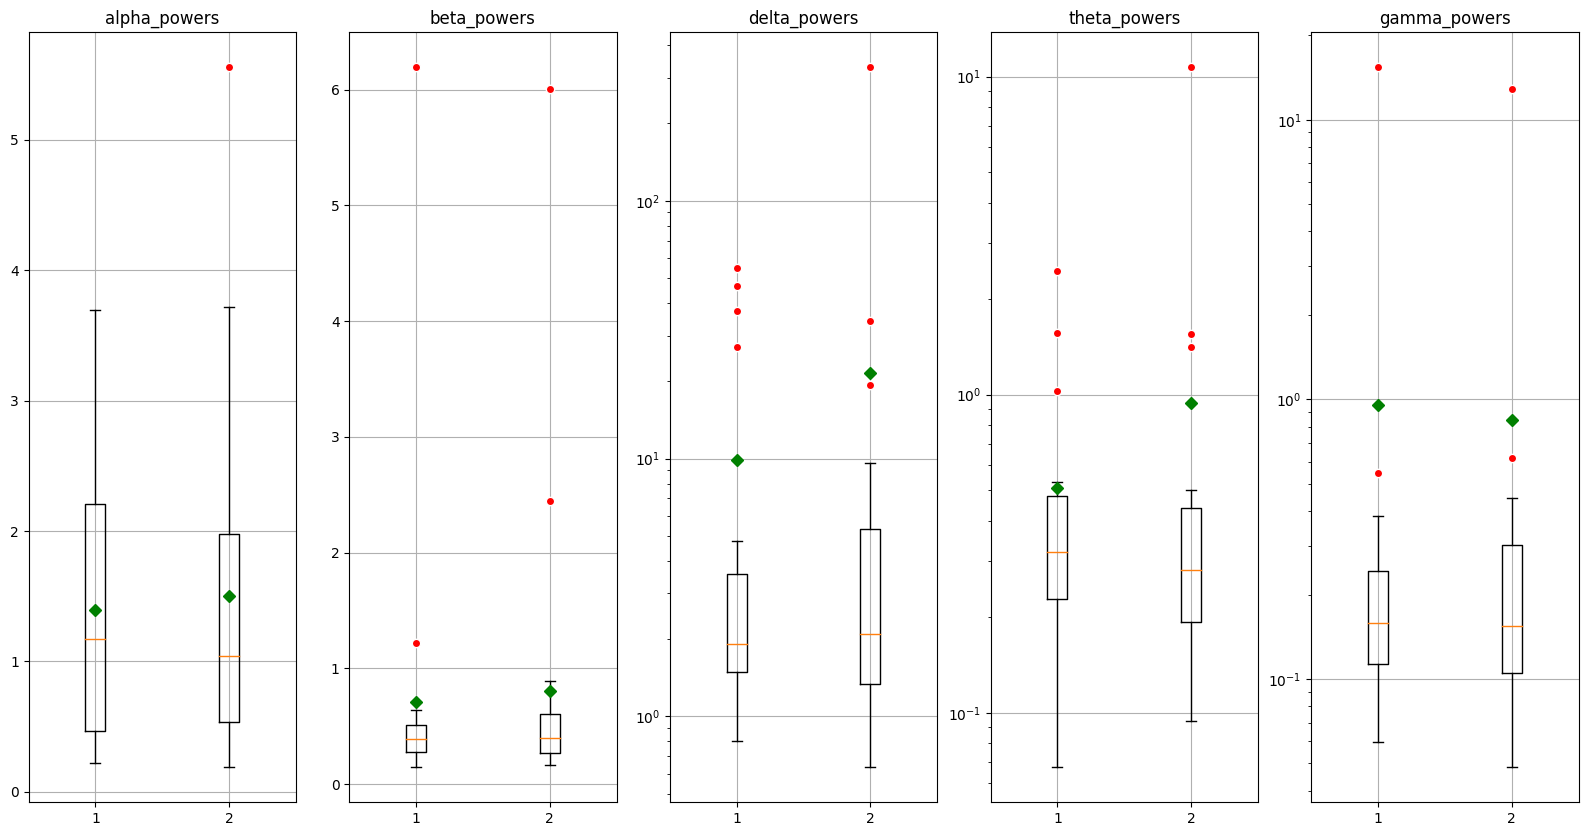

In [103]:
all_powers = [alpha_powers_pre, alpha_powers_post, beta_powers_pre, beta_powers_post, delta_powers_pre, delta_powers_post, theta_powers_pre, theta_powers_post, gamma_powers_pre, gamma_powers_post]

all_powers_labels = ['alpha_powers', 'beta_powers', 'delta_powers', 'theta_powers', 'gamma_powers']

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.figure(figsize=(20, 10))
plt.subplot(1, 5, 1)
plt.boxplot(all_powers[0: 2], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[0])
plt.grid()

plt.subplot(1, 5, 2)
plt.boxplot(all_powers[2: 4], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[1])
plt.grid()

plt.subplot(1, 5, 3)
plt.boxplot(all_powers[4: 6], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.semilogy()
plt.grid()
plt.title(all_powers_labels[2])

plt.subplot(1, 5, 4)
plt.boxplot(all_powers[6: 8], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[3])
plt.semilogy()
plt.grid()

plt.subplot(1, 5, 5)
plt.boxplot(all_powers[8: 10], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[4])
plt.semilogy()
plt.grid()
plt.show()

Looking into the relationship between all of the channels instead of combining all channels into one

In [104]:
# for i in range(20):
#     alpha_powers_pre_all[i] = alpha_powers_pre_all[i].tolist()
#     beta_powers_pre_all[i] = beta_powers_pre_all[i].tolist()
#     delta_powers_pre_all[i] = delta_powers_pre_all[i].tolist()
#     theta_powers_pre_all[i] = theta_powers_pre_all[i].tolist()
#     alpha_powers_post_all[i] = alpha_powers_post_all[i].tolist()
#     beta_powers_post_all[i] = beta_powers_post_all[i].tolist()
#     delta_powers_post_all[i] = delta_powers_post_all[i].tolist()
#     theta_powers_post_all[i] = theta_powers_post_all[i].tolist()

In [105]:
cols = []
bands = ['alpha', 'beta', 'delta', 'theta', 'gamma']

for i in range(5):
    for j in range(64):
        cols.append(bands[i] + str(j + 1))

cols.append('target')

In [106]:
all_combined_pre = []
all_combined_post = []

for i in range(20):
    all_combined_pre.append(alpha_powers_pre_all[i] + beta_powers_pre_all[i] + delta_powers_pre_all[i] + theta_powers_pre_all[i] + gamma_powers_pre_all[i] + [1])
    all_combined_post.append(alpha_powers_post_all[i] + beta_powers_post_all[i] + delta_powers_post_all[i] + theta_powers_post_all[i] + gamma_powers_post_all[i] + [0])

In [107]:

all_combined = all_combined_pre + all_combined_post
df = pd.DataFrame(all_combined, columns = cols, dtype = float)
df.to_excel('Dataset_old_method.xlsx')

Computing pairwise T plots for all powers

In [108]:
alpha_powers_pre_all_t = np.array(alpha_powers_pre_all).T.tolist()
alpha_powers_post_all_t = np.array(alpha_powers_post_all).T.tolist()
beta_powers_pre_all_t = np.array(beta_powers_pre_all).T.tolist()
beta_powers_post_all_t = np.array(beta_powers_post_all).T.tolist()
delta_powers_pre_all_t = np.array(delta_powers_pre_all).T.tolist()
delta_powers_post_all_t = np.array(delta_powers_post_all).T.tolist()
theta_powers_pre_all_t = np.array(theta_powers_pre_all).T.tolist()
theta_powers_post_all_t = np.array(theta_powers_post_all).T.tolist()
gamma_powers_pre_all_t = np.array(gamma_powers_pre_all).T.tolist()
gamma_powers_post_all_t = np.array(gamma_powers_post_all).T.tolist()

def compute_ttest(pre, post):
    results = []
    for i in range(64):
        results.append(stats.ttest_rel(pre[i], post[i]))
        if(results[i].pvalue <= 0.05):
            print(i + 1)

print("ALPHA")
compute_ttest(alpha_powers_pre_all_t, alpha_powers_post_all_t)
print("BETA")
compute_ttest(beta_powers_pre_all_t, beta_powers_post_all_t)
print("DELTA")
compute_ttest(delta_powers_pre_all_t, delta_powers_post_all_t)
print("THETA")
compute_ttest(theta_powers_pre_all_t, theta_powers_post_all_t)
print("GAMMA")
compute_ttest(gamma_powers_pre_all_t, gamma_powers_post_all_t)

ALPHA
BETA
10
36
DELTA
THETA
GAMMA
40
43
44
